# La regla empírica y la distribución

En la semana 2, analizamos la regla empírica o la regla del 68 - 95 - 99,7, que describe cuántas observaciones se encuentran a una determinada distancia de nuestra media.  Esta distancia de la media se denota como sigma, o desviación estándar (la distancia media a la que se encuentra una observación de la media).

La distribución empirica básicamente indica que dentro de la primera desviación estandar (- o +) esta el 68% de las observaciones, dentro de dos desviaciones estandar (2 * sigma) esta el 95% de las observaciones, y dentro de tres desviaciones estandar (3 * sigma) esta el 99.7% de nuestras observaciones. 



Para este tutorial, vamos a explorar el número de horas que el estudiante universitario medio recibe.

El ejemplo utilizado en la clase decía que había una media de 7 y una desviación estándar de 1,7 para las horas de sueño; utilizaremos estos mismos valores.


In [1]:
import warnings
warnings.filterwarnings("ignore")
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(1738) # semilla

In [2]:
mu = 7 #media - 7 horas

sigma = 1.7 #desviacion estandar horas

observaciones = [random.normalvariate(mu, sigma) for hora in range(100000)]


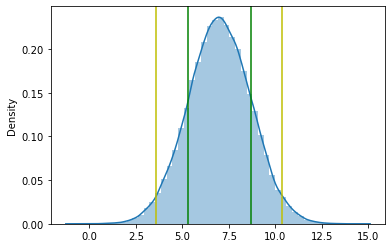

In [5]:
sns.distplot(observaciones)

plt.axvline(np.mean(observaciones)+np.std(observaciones), color="g")
plt.axvline(np.mean(observaciones)-np.std(observaciones), color = "g")

plt.axvline(np.mean(observaciones) + (np.std(observaciones)*2), color = "y")
plt.axvline(np.mean(observaciones) - (np.std(observaciones)*2), color = "y")


In [6]:
pd.Series(observaciones).describe()

count    100000.000000
mean          7.000626
std           1.693249
min          -0.754203
25%           5.865611
50%           7.003080
75%           8.144851
max          14.595650
dtype: float64

In [8]:
muestraA = random.sample(observaciones, 100)
muestraB = random.sample(observaciones, 100)
muestraC = random.sample(observaciones, 100)

<AxesSubplot:ylabel='Density'>

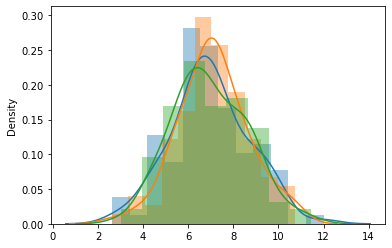

In [17]:
fig1, fig_ax = plt.subplots()

sns.distplot(muestraA, ax = fig_ax)
sns.distplot(muestraB, ax = fig_ax)
sns.distplot(muestraC, ax = fig_ax)

Ahora que hemos cubierto la regla 68 - 95 - 99,7, daremos un paso más y hablaremos de la distribución empírica.

La distribución empírica es una función de densidad acumulativa que indica la proporción de observaciones que son menores o iguales a un determinado valor.

Utilicemos la imagen inicial de arriba como ejemplo de este concepto:


Ahora, utilizando nuestras observaciones para el nuestro de sueño, podemos crear una distribución empírica en python que significa la proporción de las observaciones se observan en un número específico de horas de sueño.

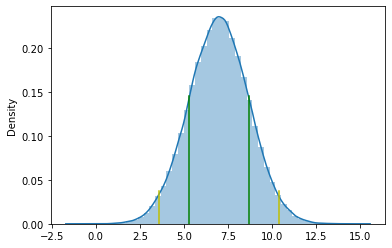

In [12]:
mu = 7 # media horas sueño

sigma = 1.7 # desviacion estandar

observaciones = [random.normalvariate(mu, sigma) for hora in range(100000)]

sns.distplot(observaciones)
plt.axvline(np.mean(observaciones)+np.std(observaciones), 0, .59, color="g")
plt.axvline(np.mean(observaciones)-np.std(observaciones), 0, .59, color="g")

plt.axvline(np.mean(observaciones) + (np.std(observaciones)*2),0, .15, color="y")
plt.axvline(np.mean(observaciones) - (np.std(observaciones)*2),0, .15, color="y")


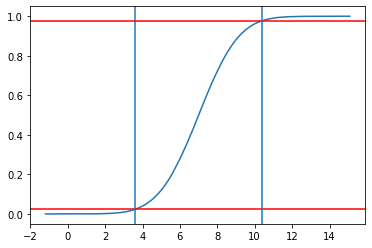

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(observaciones) 
# significa funcion empirica de densidad acumulativa

plt.plot(ecdf.x, ecdf.y)

plt.axhline(y=0.025, color="r", linestyle="-")
plt.axvline(x = np.mean(observaciones) - (2*np.std(observaciones)))

plt.axhline(y=0.975, color="r", linestyle="-")
plt.axvline(x = np.mean(observaciones) + (2*np.std(observaciones)))

